# Preprocessing of aligned TIR and VIS images
For initial tests, the same images have been selected as used in TIR-only training.
Images have been aligned using GIMP.

In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

IR shape: (11,)
VIS shape: (11,)


C:\Users\marle\AppData\Local\Temp\ipykernel_14320\1628815800.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ir = np.array(ir_list)
C:\Users\marle\AppData\Local\Temp\ipykernel_14320\1628815800.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  vis = np.array(vis_list)


(-0.5, 2329.5, 1549.5, -0.5)

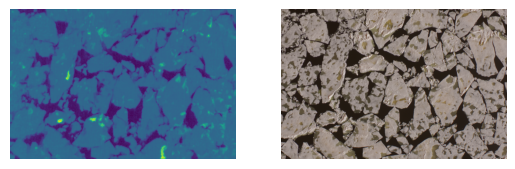

In [17]:
vis_aligned_dir = 'E:/test/alignment/vis_train_cropped'
ir_aligned_dir = 'E:/test/alignment/ir_aligned'

vis_list = []
ir_list = []

for i in os.listdir(ir_aligned_dir):
    ir = cv2.imread(os.path.join(ir_aligned_dir, i), 0)
    ir_list.append(ir)

for i in os.listdir(vis_aligned_dir):
    vis = cv2.imread(os.path.join(vis_aligned_dir, i))
    vis_list.append(vis)

ir = np.array(ir_list)
vis = np.array(vis_list)

print("IR shape: " + str(ir.shape))
print("VIS shape: " + str(vis.shape))

fig, axes = plt.subplots(1,2)

axes[0].imshow(ir[0])
axes[0].axis('off')
axes[1].imshow(vis[0])
axes[1].axis('off')

In [18]:
print(ir[0].shape)

(1550, 2330)


In [26]:
def resize_and_pad(image, target_size, nr_channels):
    # Resize while maintaining the aspect ratio
    original_width, original_height = image.shape[:2]
    aspect_ratio = original_width / original_height
    new_width = int(min(target_size, target_size * aspect_ratio))
    new_height = int(min(target_size, target_size / aspect_ratio))
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)
    
    if nr_channels == 1:
        padded_image = np.ones((target_size, target_size), dtype=np.uint8) * 255

        padded_image[(target_size - new_height) // 2:(target_size - new_height) // 2 + new_height,
                    (target_size - new_width) // 2:(target_size - new_width) // 2 + new_width] = resized_image
    
    else:
        padded_image = np.ones((target_size, target_size, nr_channels), dtype=np.uint8) * 255

        padded_image[(target_size - new_height) // 2:(target_size - new_height) // 2 + new_height,
                    (target_size - new_width) // 2:(target_size - new_width) // 2 + new_width, :] = resized_image
    
    return padded_image

# Example usage
image = ir[0]
target_size = ir[0].shape[0]
resized_and_padded_image = resize_and_pad(image, target_size, nr_channels=1)

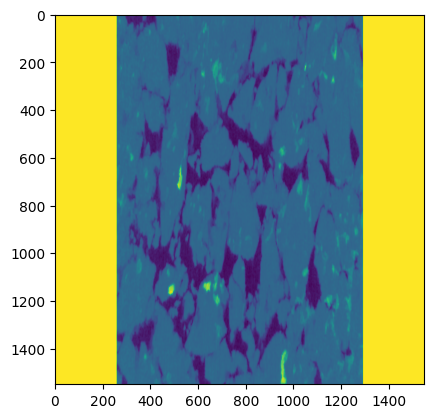

In [27]:
plt.imshow(resized_and_padded_image)